#Job Listing Integrity Investigation

Group 4: Tanvi Sheth, Sneha Sunil Ekka, Jenil Shah, Mitchelu WU, Dian Jin

# Load and Clean the Data

##Load the Data

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ddddjin
Your Kaggle Key: ··········


100%|██████████| 16.1M/16.1M [00:00<00:00, 95.7MB/s]

In [3]:
!pip install your-package-name

In [4]:
data = pd.read_csv('/content/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

##Clean the Data

In [7]:
# Fill missing values for categorical data with "Unknown"
categorical_columns = ['department', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function']
for column in categorical_columns:
    data[column].fillna('Unspecified', inplace=True)

In [8]:
# Fill missing textual data with empty strings
textual_columns = ['company_profile', 'description', 'requirements', 'benefits']
for column in textual_columns:
    data[column].fillna('', inplace=True)

In [9]:
# Substract 'Country' from country column
data['country'] = data['location'].str[:2]

In [10]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department                 0
salary_range           15012
company_profile            0
description                0
requirements               0
benefits                   0
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                   0
function                   0
fraudulent                 0
country                  346
dtype: int64

# Preprocessing the Text Data With NLP

##Tokenization

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import string
import re

In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
def preprocess_text(text):

    # Convert any non-string data to string
    text = str(text)

    # Lowercase
    text = text.lower()

    # Match special characteristics
    pattern = r'[^a-zA-Z0-9\s]'
    # Replace the matched characters with an empty string
    text = re.sub(pattern, '', text)

    # Initialize tokenizer
    tokenizer = RegexpTokenizer(r'\w+') #remove punctuation

    # Tokenize text
    tokens = tokenizer.tokenize(text)

    # Tokenize text
    #tokens = word_tokenize(text)

    # Remove stop words and trailing space
    stop_words = set(stopwords.words('english'))
    tokens = [word.strip() for word in tokens if word not in stop_words and len(word) > 1]

    # Rejoin tokens into a string
    text = ' '.join(tokens)

    return text

## Vectorizarion

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Wordcloud for company_profile


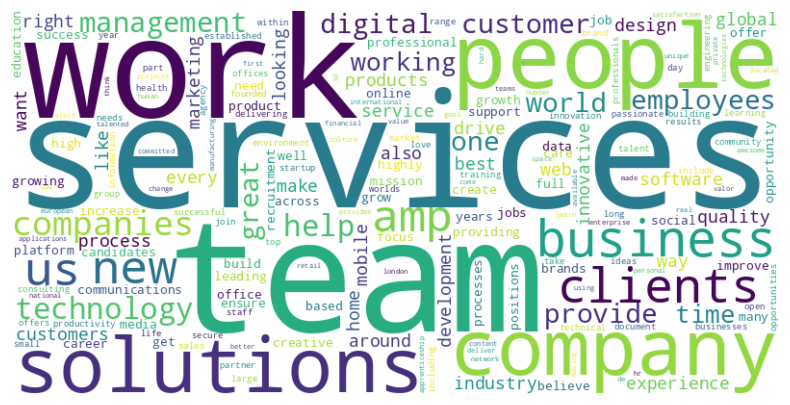

Wordcloud for description


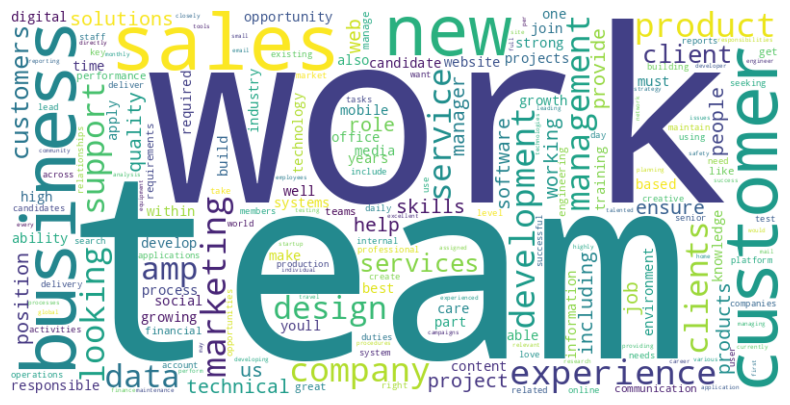

Wordcloud for requirements


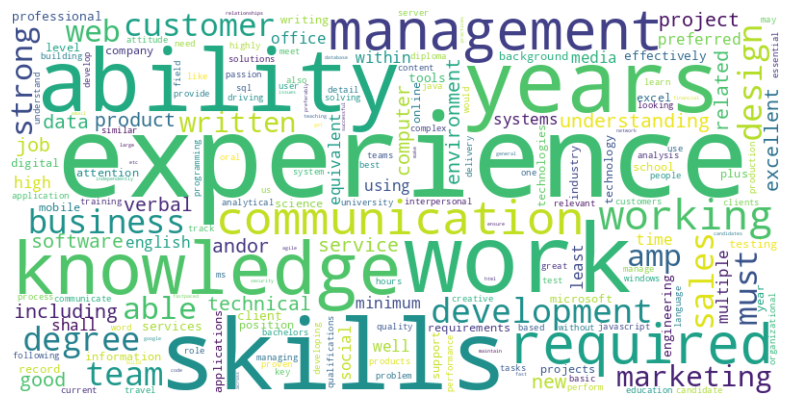

In [15]:
text_columns = ['company_profile', 'description', 'requirements']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(norm=None)

# A list to hold TF-IDF vectors for each text column
tfidf_vector_list = []

for column in text_columns:

  # Apply preprocessing to the dataset
  data_processed = data[column].apply(preprocess_text)

  # Vetorization
  df_tfidf_transformed = tfidf_vectorizer.fit_transform(data_processed)
  tfidf_vectors = pd.DataFrame(df_tfidf_transformed.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
  tfidf_vector_list.append(tfidf_vectors)

  # Plot the word cloud for each column
  print('Wordcloud for', column)

  wordcloud_data = tfidf_vectors.sum(axis=0)  # Sum the TF-IDF vectors for each word
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

  #wordcloud_data = {word: df_tfidf_transformed[0, idx] for idx, word in enumerate(tfidf_model.get_feature_names_out())}
  #wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# EDA

In [16]:
import plotly.express as px

In [17]:
# Plot of Distribution of Employment Types

employment_counts = data['employment_type'].value_counts().reset_index()
employment_counts.columns = ['employment_type', 'count']

# Plot using Plotly
fig = px.bar(employment_counts,
             y='employment_type',
             x='count',
             color='employment_type',
             orientation='h',
             title='Distribution of Employment Types',
             labels={'count': 'Count', 'employment_type': 'Employment Type'},
             color_discrete_sequence=px.colors.qualitative.Pastel
            )

fig.show()

In [18]:
# Plot of Distribution of Required Education for Job Postings

required_education = data['required_education'].value_counts().reset_index()
required_education.columns = ['required_education', 'count']

fig = px.bar(required_education,
             y='required_education',
             x='count',
             color='required_education',
             orientation='h',
             title='Distribution of Required Education for Job Postings',
             labels={'count': 'Count', 'required_education': 'Required Education'},
             color_discrete_sequence=px.colors.qualitative.Pastel
            )

fig.show()

In [19]:
# Plot of Top 10 Industries Represented in Job Postings

top_industries = data['industry'].value_counts().reset_index().head(10)
top_industries.columns = ['industry', 'count']

fig = px.bar(top_industries,
             y='industry',
             x='count',
             color='industry',
             orientation='h',
             title='Top 10 Industries Represented in Job Postings',
             labels={'count': 'Count', 'industry': 'Industry'},
             color_discrete_sequence=px.colors.qualitative.Pastel,

            )
fig.show()

In [20]:
# Plot of Distribution of Job Postings With and Without Company Logo
fig = px.histogram(data, x='has_company_logo', color='fraudulent', barmode='group', category_orders={'has_company_logo': ['f', 't']}, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title='Distribution of Job Postings With and Without Company Logo',
    xaxis_title='Has Company Logo',
    yaxis_title='Count',
    width=800,
    height=600
)
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['No', 'Yes']))

fig.show()

In [21]:
# Plot of Distribution of Telecommuting Job Postings

fig = px.histogram(data, x='telecommuting', color='fraudulent', barmode='group', category_orders={'telecommuting': ['f', 't']}, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title='Distribution of Telecommuting Job Postings',
    xaxis_title='Telecommuting',
    yaxis_title='Count',
    width=800,
    height=600
)
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['No', 'Yes']))

fig.show()

In [22]:
# Plot of Distribution of Job Postings With and Without Questions

fig = px.histogram(data, x='has_questions', color='fraudulent', barmode='group', category_orders={'has_questions': ['f', 't']}, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title='Distribution of Job Postings With and Without Questions',
    xaxis_title='Has Questions',
    yaxis_title='Count',
    width=800,
    height=600
)
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['No', 'Yes']))
fig.show()

# Clustring

In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Combine the TF-IDF vectors for all text columns
combined_tfidf_vectors = pd.concat(tfidf_vector_list, axis=1)

# Initialize PCA
pca = PCA(n_components=50)

# Set StandardScaler
scaler = StandardScaler()

# Perform clustering, for example with K-Means
kmeans = KMeans(n_clusters=2)

# Create a pipeline with scaling, PCA, and K-Means
pipeline = make_pipeline(scaler, pca, kmeans)

# Fit the pipeline to your data
pipeline.fit(combined_tfidf_vectors)

# Predict the cluster labels
cluster_labels = pipeline.predict(combined_tfidf_vectors)

# Add the cluster labels
data['cluster'] = cluster_labels

print(data['cluster'].value_counts())